In [16]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Given time series data
data = [4241	,5015	,214	,2658	,3952,	861	,9088,	8068,	793,	7966]

# Creating a DataFrame for better handling
df = pd.DataFrame(data, columns=["Value"])

# Plotting the time series data
# plt.figure(figsize=(10,6))
# plt.plot(df.index, df['Value'], marker='o')
# plt.title('Time Series Plot')
# plt.xlabel('Time Point')
# plt.ylabel('Value')
# plt.grid(True)
# plt.show()

# Performing the Augmented Dickey-Fuller test
adf_result = adfuller(df['Value'])
adf_statistic, p_value = adf_result[0], adf_result[1]

adf_statistic, p_value

(-17.05665507216433, 8.000024562263146e-30)

In [13]:
import pandas as pd
df=pd.read_csv(r"C:\Users\61401\Downloads\Book2.csv")

adf_results = []

# Iterate over each row in the DataFrame and perform the ADF test more robustly
for index, row in df.iterrows():
    # Drop NaN values from the row and convert to a list
    row_data = row.dropna().tolist()
    
    # Check if there are enough data points to perform the test, and if so, perform the ADF test
    if len(row_data) > 4:  # Let's try with at least five data points to perform the test
        try:
            adf_statistic, p_value, _, _, _, _ = adfuller(row_data)
        except ValueError:  # Handle any errors due to insufficient data points
            adf_statistic, p_value = None, None
    else:
        adf_statistic, p_value = None, None  # Not enough data points to perform the test
    
    # Append the results to the list
    adf_results.append((adf_statistic, p_value))

# Convert the results to a DataFrame
adf_df = pd.DataFrame(adf_results, columns=['ADF Statistic', 'p-value'])

adf_df.head()

,ADF Statistic,p-value
0,-0.845001,0.805545
1,-1.814777,0.373150
2,-2.520246,0.110626
3,-2.208861,0.203045
4,-0.998743,0.753723


In [14]:
adf_df.to_csv('dicky_fueler.csv')

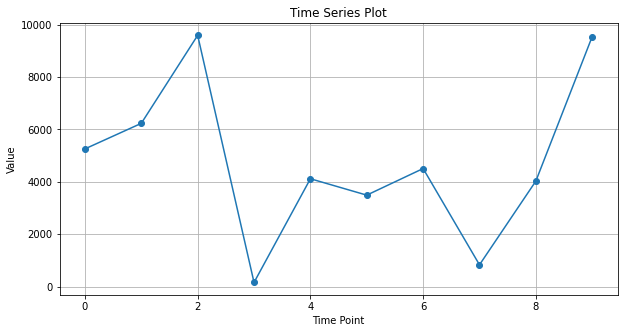

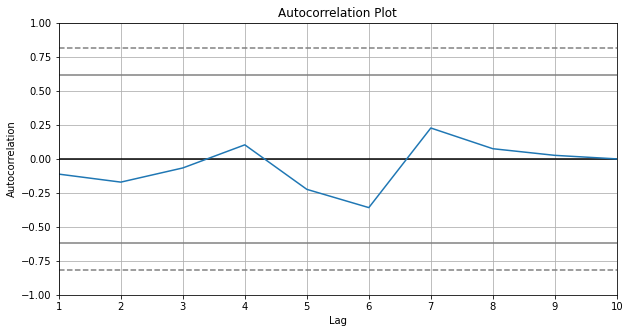

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import autocorrelation_plot

# Given data series
data = [5257, 6232, 9590, 160, 4117, 3492, 4507, 833, 4028, 9544]
series = pd.Series(data)

# Plotting the data series
plt.figure(figsize=(10,5))
plt.plot(series, marker='o')
plt.title('Time Series Plot')
plt.xlabel('Time Point')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Plotting the autocorrelation plot
plt.figure(figsize=(10,5))
autocorrelation_plot(series)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

In [ ]:
#main code starts here

In [1]:
import pandas as pd
all_sheets = pd.read_excel(r"C:\Users\61401\Downloads\optiver-trading-at-the-close\Strategic Data Scientist Assessment.xlsx", sheet_name=None)

# Access sheets by name
bank_statements = all_sheets['bank_statements']
bank_statements

,employeeid,transaction_amount
0,3592,1760
1,1454,3693
2,4001,9108
3,2023,1317
4,1490,2076
...,...,...
42161,3258,4881
42162,132,9401
42163,1746,1983
42164,4926,7398


<AxesSubplot: xlabel='employeeid'>

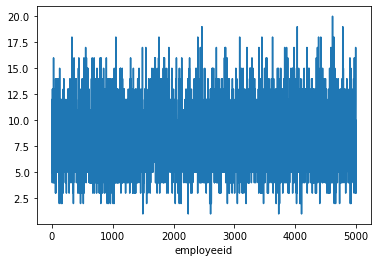

In [6]:
(bank_statements
 .groupby(['employeeid'])
 .size()
 .plot()
)

<AxesSubplot: ylabel='Frequency'>

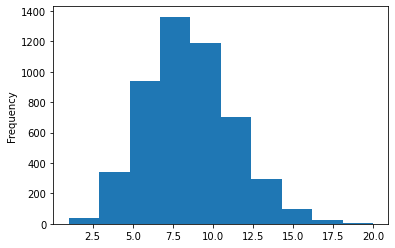

In [7]:
(bank_statements
 .groupby(['employeeid'])
 .size()
 .plot(kind='hist')
)

<AxesSubplot: ylabel='Frequency'>

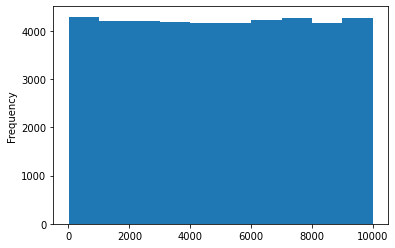

In [3]:
(bank_statements
 .transaction_amount
 .plot(kind='hist')
)

In [ ]:
#so based on above graphs it seems we are delaing with totally randomlu generated values for bank_statemenet

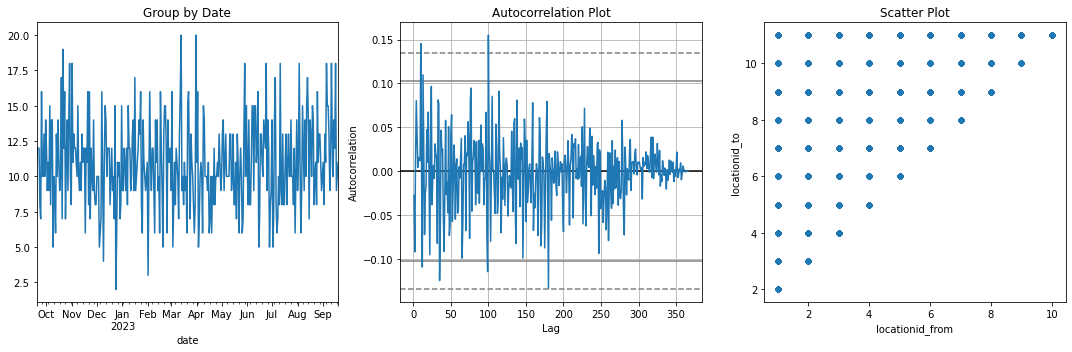

In [21]:
#employee movement
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

employee_movements = all_sheets['employee_movements']

# Create a figure
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))  # 1 row, 3 columns

# Plot 1: Group by 'date' and plot
(employee_movements
 .groupby(['date'])
 .size()
 .plot(ax=axes[0], title='Group by Date')

)

# Plot 2: Autocorrelation plot
A = employee_movements.groupby(['date']).size()
autocorrelation_plot(A, ax=axes[1])
axes[1].set_title('Autocorrelation Plot')

# Plot 3: Scatter plot of 'locationid_from' vs 'locationid_to'
(employee_movements
 .plot
 .scatter(x='locationid_from', y='locationid_to', ax=axes[2], title='Scatter Plot')
)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

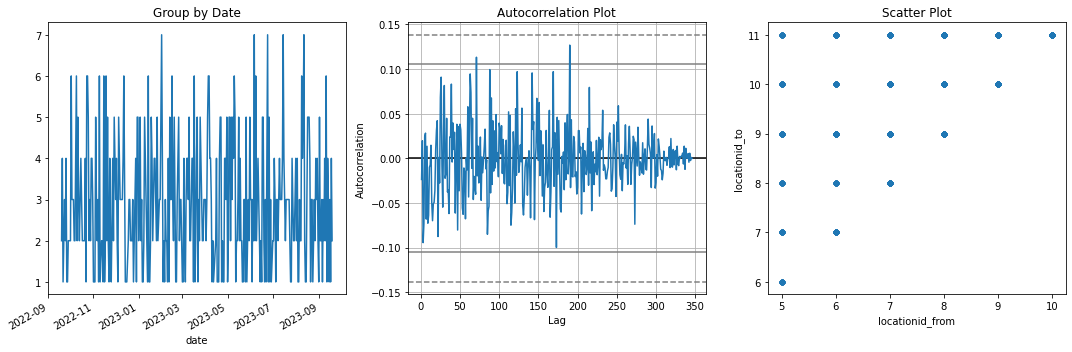

In [23]:
#prganise crime movement
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

organised_crime_movements = all_sheets['organised_crime_movements']

# Create a figure
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))  # 1 row, 3 columns

# Plot 1: Group by 'date' and plot
(employee_movements
 .groupby(['date'])
 .size()
 .plot(ax=axes[0], title='Group by Date')

)

# Plot 2: Autocorrelation plot
A = employee_movements.groupby(['date']).size()
autocorrelation_plot(A, ax=axes[1])
axes[1].set_title('Autocorrelation Plot')

# Plot 3: Scatter plot of 'locationid_from' vs 'locationid_to'
(employee_movements
 .plot
 .scatter(x='locationid_from', y='locationid_to', ax=axes[2], title='Scatter Plot')
)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

<AxesSubplot: ylabel='Frequency'>

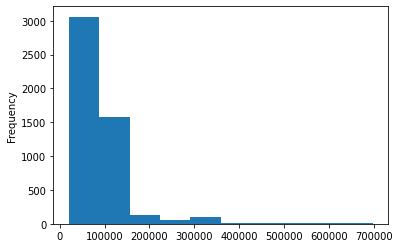

In [24]:
vehicles = all_sheets['vehicles']
(vehicles
.vehicle_current_market_value 
.plot(kind='hist'))

<AxesSubplot: ylabel='Frequency'>

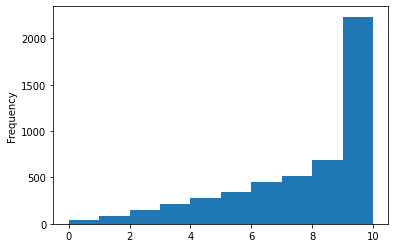

In [26]:
(vehicles
.vehicle_type 
.plot(kind='hist'))

<AxesSubplot: xlabel='vehicle_brand'>

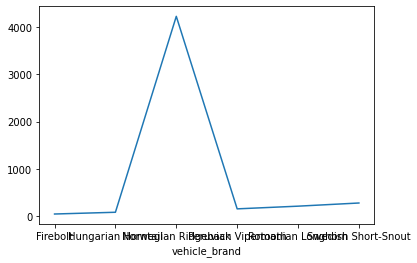

In [29]:
(vehicles
.groupby(['vehicle_brand'])
.size()         
.plot()
)

<AxesSubplot: ylabel='Frequency'>

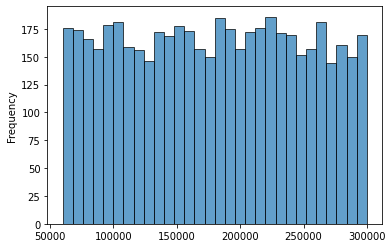

In [32]:
(vehicles
.distance_travelled_in_km 
.plot(kind='hist',bins=30, edgecolor='k', alpha=0.7)
)

In [33]:
def randomness_check(data):
    # Kolmogorov-Smirnov Test: We'll perform this test twice, once assuming a uniform distribution and once assuming a normal distribution.
    # Shapiro-Wilk Test: This test assesses whether the data is likely to be drawn from a normal distribution.
    # Entropy Analysis: We'll compute the entropy of the data to assess its randomness.
    from scipy.stats import ks_2samp, uniform
    min_val = data.min()
    max_val = data.max()
    uniform_data = uniform.rvs(loc=min_val, scale=max_val-min_val, size=len(data))

    # Perform the Kolmogorov-Smirnov test to compare the observed data to the generated uniform distribution
    ks_stat_uniform, ks_p_value_uniform = ks_2samp(data, uniform_data)

    #We will perform the Kolmogorov-Smirnov test again, this time comparing the observed distribution to a normal distribution.
    # We will perform the Shapiro-Wilk test to assess the normality of the data.
    # Finally, we will compute the entropy of the data to assess its randomness.
    # Let's proceed with comparing the observed distribution to a normal distribution using the Kolmogorov-Smirnov test.

    from scipy.stats import norm

    # Fit a normal distribution to the observed data
    mean, std = norm.fit(data)

    # Generate a normal distribution with the same mean, standard deviation, and number of samples as the observed data
    normal_data = norm.rvs(loc=mean, scale=std, size=len(data))

    # Perform the Kolmogorov-Smirnov test to compare the observed data to the generated normal distribution
    ks_stat_normal, ks_p_value_normal = ks_2samp(data, normal_data)

    #Let's compute the entropy of the data to assess its randomness. High entropy is indicative of higher randomness in the data.
    from scipy.stats import entropy

    # Compute the entropy of the data
    data_entropy = entropy(data.value_counts(normalize=True))

    return data_entropy,ks_stat_normal, ks_p_value_normal,ks_stat_uniform, ks_p_value_uniform

In [36]:
data_entropy,ks_stat_normal, ks_p_value_normal,ks_stat_uniform, ks_p_value_uniform=randomness_check(vehicles.distance_travelled_in_km)
table_df = pd.DataFrame({
    'Data Entropy': [data_entropy],
    'KS Statistic (Normal)': [ks_stat_normal],
    'KS P-value (Normal)': [ks_p_value_normal],
    'KS Statistic (Uniform)': [ks_stat_uniform],
    'KS P-value (Uniform)': [ks_p_value_uniform]
})

table_df

,Data Entropy,KS Statistic (Normal),KS P-value (Normal),KS Statistic (Uniform),KS P-value (Uniform)
0,8.506275,0.0658,7.824962e-10,0.0156,0.577046


In [ ]:
#high entropy shows a high degree of randomness and with high p_value for uniform distrbution we cant reject
#that null hypothesis that the distributions is uniform, so it is possibly uniformly distributed.

<AxesSubplot: ylabel='Frequency'>

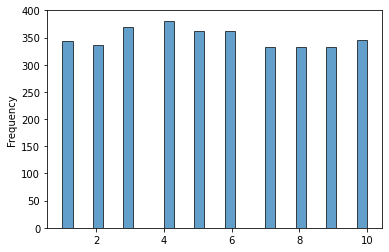

In [43]:
(train_data
 .employee_rank
 .plot(kind='hist',bins=30, edgecolor='k', alpha=0.7)
 )

In [39]:
train_data = all_sheets['train_data']
data_entropy,ks_stat_normal, ks_p_value_normal,ks_stat_uniform, ks_p_value_uniform=randomness_check(train_data.employee_rank)
table_df = pd.DataFrame({
    'Data Entropy': [data_entropy],
    'KS Statistic (Normal)': [ks_stat_normal],
    'KS P-value (Normal)': [ks_p_value_normal],
    'KS Statistic (Uniform)': [ks_stat_uniform],
    'KS P-value (Uniform)': [ks_p_value_uniform]
})

table_df

,Data Entropy,KS Statistic (Normal),KS P-value (Normal),KS Statistic (Uniform),KS P-value (Uniform)
0,2.301462,0.106571,1.016202e-17,0.098857,2.654699e-15


<AxesSubplot: ylabel='Frequency'>

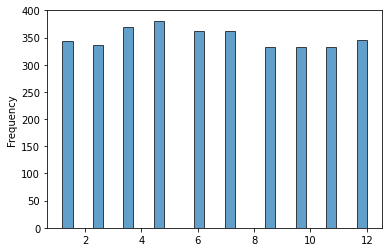

In [44]:
(train_data
 .years_of_service
 .plot(kind='hist',bins=30, edgecolor='k', alpha=0.7)
 )

In [42]:
train_data = all_sheets['train_data']
data_entropy,ks_stat_normal, ks_p_value_normal,ks_stat_uniform, ks_p_value_uniform=randomness_check(train_data.years_of_service)
table_df = pd.DataFrame({
    'Data Entropy': [data_entropy],
    'KS Statistic (Normal)': [ks_stat_normal],
    'KS P-value (Normal)': [ks_p_value_normal],
    'KS Statistic (Uniform)': [ks_stat_uniform],
    'KS P-value (Uniform)': [ks_p_value_uniform]
})

table_df

,Data Entropy,KS Statistic (Normal),KS P-value (Normal),KS Statistic (Uniform),KS P-value (Uniform)
0,2.301462,0.102571,1.919014e-16,0.098857,2.654699e-15


In [ ]:
#it seems years of service and employee randk follow the same distrbution

In [48]:
# from scipy.stats import ks_2samp

# # Perform the two-sample Kolmogorov-Smirnov test to compare the distributions of the two datasets
# ks_stat_two_sample, ks_p_value_two_sample = ks_2samp(train_data['employee_rank'], train_data['years_of_service'])

# ks_stat_two_sample, ks_p_value_two_sample

(0.19857142857142857, 9.414415799972523e-61)

<AxesSubplot: xlabel='years_of_service', ylabel='employee_rank'>

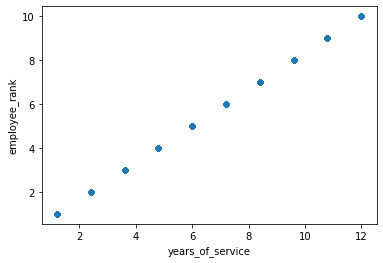

In [50]:
(train_data
.plot
.scatter(y='employee_rank',x='years_of_service')
)

<AxesSubplot: ylabel='Frequency'>

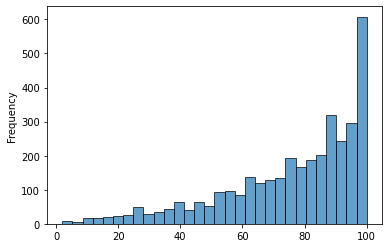

In [52]:
(train_data
.pmes_score
.plot(kind='hist',bins=30, edgecolor='k', alpha=0.7)
)

<AxesSubplot: ylabel='Frequency'>

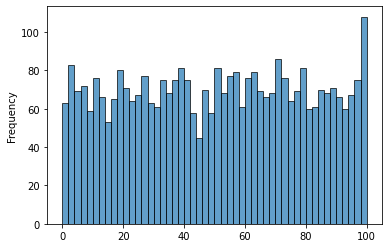

In [55]:
(train_data
.keyword_hits
.plot(kind='hist',bins=50, edgecolor='k', alpha=0.7)
)

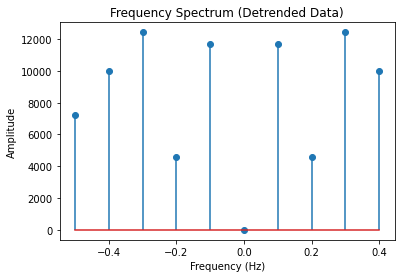

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Detrend the time series by subtracting the mean
detrended_data = np.array(data) - np.mean(data)

# Perform Fourier Transform on detrended data
fft_res = np.fft.fft(detrended_data)
frequencies = np.fft.fftfreq(len(fft_res))

# Plot the spectrum
plt.stem(frequencies, np.abs(fft_res))
plt.title('Frequency Spectrum (Detrended Data)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [20]:
import pywt
new_data = [7047, 10, 8291, 9691, 8490, 1236, 8727, 7866, 9790, 2226]

# Compute the Continuous Wavelet Transform of the new time series data
# Define the wavelet to be used (Morlet wavelet is commonly used for CWT)
wavelet = 'cmor'
scales = np.arange(1, len(new_data) + 1)
new_coefficients, new_frequencies = pywt.cwt(new_data, scales, wavelet)

data = [8288	,4440	,4854	,4215	,1010,	4961,	356,	4862,	5612	,6953	,8651	,2167	,1179,	5363,	9089]



# Define the scale range to be used in the CWT
scales = np.arange(1, len(data) + 1)

# Compute the Continuous Wavelet Transform of the time series data
coefficients, frequencies = pywt.cwt(data, scales, wavelet)

c:\Users\61401\AppData\Local\Programs\Python\Python39\lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


In [7]:
#Dont use this one

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

dataset = pd.read_csv(r"C:\Users\61401\Downloads\Book5.csv" )
categorical_columns = ['sex', 'integrity_assessment', 'vehicle_brand']

y=dataset['investigation_outcome']
dataset=dataset.drop('investigation_outcome', axis=1)
# Apply one-hot encoding to categorical columns and scale numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), dataset.columns.difference(categorical_columns + ['investigation_outcome'])),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Define features (X) and target variable (y)
data_transformed = preprocessor.fit_transform(dataset)


num_cols = dataset.columns.difference(categorical_columns + ['investigation_outcome'])

# For categorical columns, we need to get the names of the one-hot encoded columns
cat_cols = (preprocessor.named_transformers_['cat']
            .get_feature_names_out(input_features=categorical_columns))

# Combine numerical and one-hot encoded column names
all_cols = num_cols.tolist() + cat_cols.tolist()

dataset=pd.DataFrame(data_transformed,columns=all_cols)

# X = dataset.drop('investigation_outcome', axis=1)
# y = dataset['investigation_outcome']


X = dataset

smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)


# Split the Dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Construct the pipeline with the preprocessor and the classifier
# model = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
# ])


model = Pipeline([
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the Model on the Validation Set
from sklearn.metrics import accuracy_score, classification_report
y_val_pred = model.predict(X_temp)
accuracy = accuracy_score(y_temp, y_val_pred)
classification_rep = classification_report(y_temp, y_val_pred)
conf_matrix = confusion_matrix(y_temp, y_val_pred)
print(f'Validation Accuracy: {accuracy}')
print('Classification Report on Validation Set:')
print(classification_rep)
print(conf_matrix)

Validation Accuracy: 0.951240376390077
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       606
           1       0.99      0.91      0.95       563

    accuracy                           0.95      1169
   macro avg       0.96      0.95      0.95      1169
weighted avg       0.95      0.95      0.95      1169

[[601   5]
 [ 52 511]]


In [8]:
#use this one instead

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

dataset = pd.read_csv(r"C:\Users\61401\Downloads\Book5.csv" )
categorical_columns = ['sex', 'integrity_assessment', 'vehicle_brand']

y=dataset['investigation_outcome']
dataset=dataset.drop('investigation_outcome', axis=1)
# Apply one-hot encoding to categorical columns and scale numerical columns

dataset=pd.get_dummies(dataset)
for col in dataset.columns:
    if dataset[col].dtype == 'bool':
        dataset[col] = dataset[col].astype(int)
# X = dataset.drop('investigation_outcome', axis=1)
# y = dataset['investigation_outcome']


X = dataset

smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)


# Split the Dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Construct the pipeline with the preprocessor and the classifier
# model = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
# ])


model = Pipeline([
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the Model on the Validation Set
from sklearn.metrics import accuracy_score, classification_report
y_val_pred = model.predict(X_temp)
accuracy = accuracy_score(y_temp, y_val_pred)
classification_rep = classification_report(y_temp, y_val_pred)
conf_matrix = confusion_matrix(y_temp, y_val_pred)
print(f'Validation Accuracy: {accuracy}')
print('Classification Report on Validation Set:')
print(classification_rep)
print(conf_matrix)

Validation Accuracy: 0.9332763045337895
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       606
           1       0.97      0.89      0.93       563

    accuracy                           0.93      1169
   macro avg       0.94      0.93      0.93      1169
weighted avg       0.94      0.93      0.93      1169

[[591  15]
 [ 63 500]]


In [18]:
X_temp.to_csv('xxxxx.csv')

In [35]:
Z=pd.get_dummies(X,columns=['sex','integrity_assessment','vehicle_brand'])
for col in Z.columns:
    if Z[col].dtype == 'bool':
        Z[col] = Z[col].astype(int)
Z
#Z.to_csv('classification.csv')

,employee_rank,years_of_service,tenure_in_department,salary,pmes_score,performance_score,keyword_hits,vehicle_type,vehicle_current_market_value,distance_travelled_in_km,...,totalspend,sex_F,sex_M,integrity_assessment_Fail,integrity_assessment_Pass,vehicle_brand_Hungarian Horntail,vehicle_brand_Norwegian Ridgeback,vehicle_brand_Peruvian Vipertooth,vehicle_brand_Romanian Longhorn,vehicle_brand_Swedish Short-Snout
0,4,4.8,3,83489,61,91,98,8,68056,209697,...,23855,0,1,0,1,0,1,0,0,0
1,6,7.2,6,112025,66,83,49,1,95253,70798,...,35858,0,1,0,1,0,1,0,0,0
2,9,10.8,3,153823,99,52,4,3,118615,222759,...,55463,0,1,0,1,0,1,0,0,0
3,6,7.2,4,113174,55,45,12,11,52753,265159,...,25433,1,0,0,1,0,1,0,0,0
4,9,10.8,6,152652,64,83,41,5,61967,171122,...,39776,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,1,1.2,1,50232,60,78,83,5,47529,271767,...,75907,1,0,0,1,0,1,0,0,0
3220,7,8.4,5,122864,89,78,43,11,92632,263623,...,38115,1,0,0,1,0,1,0,0,0
3221,3,3.6,2,79046,76,100,19,8,62304,73498,...,59110,0,1,0,1,0,1,0,0,0
3222,9,10.8,10,158350,89,47,16,16,50878,111858,...,29451,0,1,0,1,0,1,0,0,0


In [37]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns (exclude boolean columns)
numeric_columns = Z.select_dtypes(include=['float64', 'int64']).columns

# Exclude the 'Unnamed: 0' column as it seems to be an index column


# Scale the numeric features
scaler = StandardScaler()
data_scaled = Z.copy()
data_scaled[numeric_columns] = scaler.fit_transform(Z[numeric_columns])

from sklearn.decomposition import PCA
import numpy as np

# Perform PCA
pca = PCA()

# Fit and transform the scaled data (excluding 'Unnamed: 0' column and boolean columns)
data_pca = pca.fit_transform(data_scaled.drop(columns= Z.select_dtypes(include='bool').columns.tolist()))

# Determine the number of components to retain 95% of the variance
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance_ratio_cumsum >= 0.95) + 1  # Adding 1 as numpy uses zero-based indexing

# Transform the data using the selected number of components
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_pca)

n_components, explained_variance_ratio_cumsum, data_pca.shape


(13,
 array([0.27790179, 0.37648012, 0.44140298, 0.50550108, 0.56806201,
        0.6280376 , 0.68739143, 0.74288415, 0.79749853, 0.84744861,
        0.8915544 , 0.92542542, 0.95454254, 0.97090755, 0.98332539,
        0.99055892, 0.99604849, 0.99824434, 0.99950873, 0.99977498,
        1.        , 1.        , 1.        , 1.        , 1.        ]),
 (3224, 13))

c:\Users\61401\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\61401\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\61401\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\61401\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

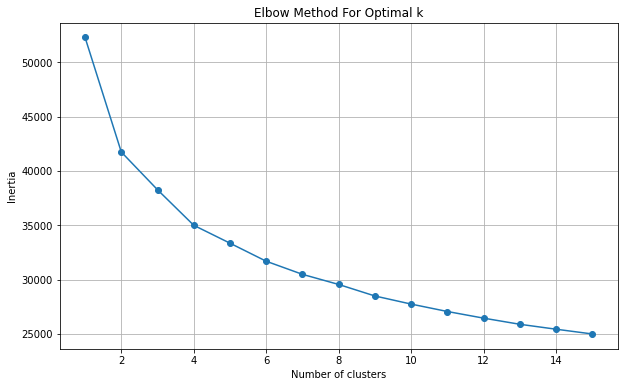

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []  # Sum of squared distances of samples to their closest cluster center
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [41]:
kmeans = KMeans(n_clusters=4, random_state=42)
X['cluster'] = kmeans.fit_predict(data_pca)

# Display the first few rows of the dataframe with the assigned cluster labels
data_head_with_clusters = X.head()
data_head_with_clusters

c:\Users\61401\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,employee_rank,sex,years_of_service,tenure_in_department,salary,pmes_score,integrity_assessment,performance_score,keyword_hits,vehicle_type,vehicle_brand,vehicle_current_market_value,distance_travelled_in_km,ADF Statistic,p-value,number of tiem have been in the same place as criminal,ratiowordyear,ratioworddepartmenet,totalspend,cluster
0,4,M,4.8,3,83489,61,Pass,91,98,8,Norwegian Ridgeback,68056,209697,-0.845001,0.805545,0,20.416667,32.666667,23855,2
1,6,M,7.2,6,112025,66,Pass,83,49,1,Norwegian Ridgeback,95253,70798,-1.814777,0.373150,0,6.805556,8.166667,35858,0
2,9,M,10.8,3,153823,99,Pass,52,4,3,Norwegian Ridgeback,118615,222759,-2.520246,0.110626,0,0.370370,1.333333,55463,1
3,6,F,7.2,4,113174,55,Pass,45,12,11,Norwegian Ridgeback,52753,265159,-2.208861,0.203045,0,1.666667,3.000000,25433,1
4,9,M,10.8,6,152652,64,Pass,83,41,5,Norwegian Ridgeback,61967,171122,-0.998743,0.753723,0,3.796296,6.833333,39776,1


In [42]:
X.to_csv('xxxxxxxxxx.csv')